###### Adrien Passuello - Axel Sauvaget - Paul Bourin

# Master 1 - Projet Apprentissage Statistique

## Sujet 1 : Régression logistique multi-catégories vs K-NN sur Iris

### Table des matières :

* [Présentation des données](#chapter0)
* [Classification par $K$-NN](#chapter1)
    * [Un premier classifieur $K$-NN](#section_1_2)
    * [Frontière de décision pour $K$-NN](#section_1_2)
    * [Validation croisée](#section_1_3)
* [Régression logistique multi-catégories](#chapter2)
* [Comparaison des modèles](#chapter3)
* [Conclusion](#chapter4)

### Présentation des données <a class="anchor" id="chapter0"></a>

In [1]:
# Pour des raisons des présentations, les messages d'"attention" ("Warning") ont été retiré via le package suivant
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris() # importation des données Iris


In [3]:
# Pour des raisons de présentation, certains paramètres de Matplotlib ont été modifiés
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          'axes.labelsize': 22,
          'axes.titlesize': 22,
          'legend.fontsize':15,
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : False,
          "font.family" : "sans-serif",
          "font.serif" : ["DejaVu Sans"],
          'text.latex.preamble': r"\usepackage{amsmath}",
          'font.size': 12,
          'figure.subplot.bottom': 0.11,
          'figure.titlesize': 25,
          'axes.titlepad': 7.0,
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large'}
plt.rcParams.update(params)

__**<u><center>Échantillon du tableau des données Iris</center>**__
    
| Observation | sepal length (cm) | sepal width (cm) |petal length (cm)| petal width (cm) | Label |
| :-: | :-: | :-: | :-: | :-: | :-:| 
| **0** |5,1 | 3,5 | 1,4| 0,2 | 0 |
| **1**| 4,9 | 3  | 1,4 | 0,2| 0 |
| **2** | 4,6| 3,1| 1,5| 0,2 | 0 |
| **...** | ... | ... | ... | ... | ... |
| **147** | 6,5| 3 | 5,2| 2| 2|
| **148** | 6,2| 3,4| 5,4| 2,3|2 |
| **149** | 5,9| 3 | 5,1| 1,8| 2|




On cherche à prédire l'espèce d'iris parmi Setosa, Versicolor et Virginica (de labels respectifs 0,1 et 2) en fonction de quatre features : les longueurs et largeurs de sépales et pétales (en cm) (`sepal length (cm)`,`sepal width (cm)`,`petal length (cm)`,`petal width (cm)`). 

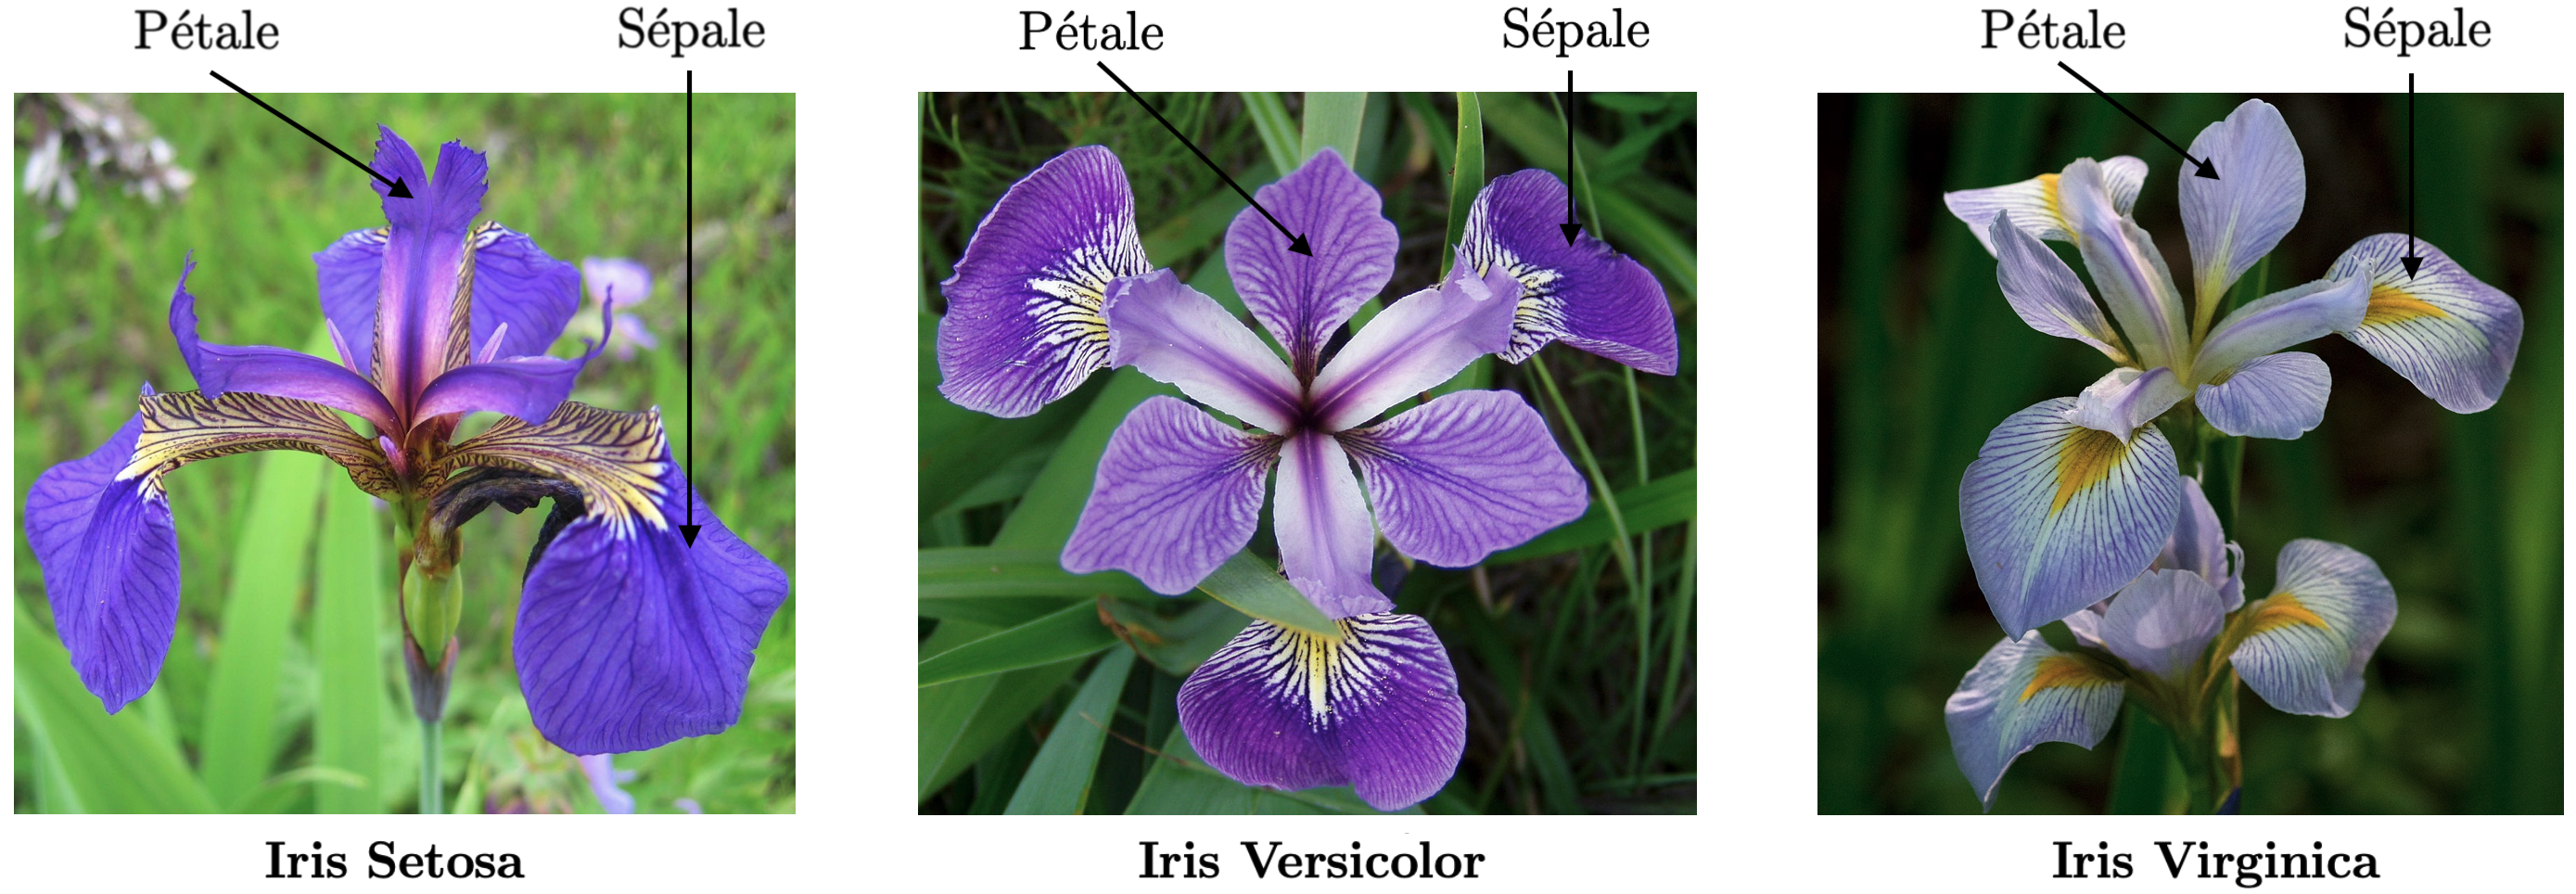
**NB :** (ces images proviennent de https://fr.wikipedia.org/wiki/Iris_(genre_végétal))

In [4]:
# On sépare les données en features et label
X=iris.data # features
y=iris.target # label

#### Exploration des données

In [5]:
print("Les dimensions de X sont :",X.shape)
print("Les dimensions de y sont :",y.shape)
print(f"On a donc {len(y)} données dans l'ensemble Iris")

Les dimensions de X sont : (150, 4)
Les dimensions de y sont : (150,)
On a donc 150 données dans l'ensemble Iris


In [6]:
# On va séparer les features et label en deux ensembles (entrainement/test)
# Pour cela on utilise la fonction train_test_split de la libairie sklearn.model_selection
# On place 77% des données dans l'ensemble d'entrainement et 33% dans l'ensemble de test
taille_ensemble_test = 0.33
# On fixe la graine aléatoire de train_test_split
graine = 123

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=taille_ensemble_test, random_state=graine)

### Classification par $K$-NN <a class="anchor" id="chapter1"></a>

#### Un premier classifieur $K$-NN <a class="anchor" id="section_1_1"></a>

Comme vu lors du TP2, voici un classifieur $K$-NN pour $K = 3$.

In [7]:
from sklearn.neighbors import KNeighborsClassifier # on importe la fonction classifieur K-NN de Sklearn
knn_classifieur = KNeighborsClassifier(n_neighbors=3) # on crée un classifieur K-NN pour K = 3
knn_classifieur.fit(X_train, y_train) # on entraine le classifieur sur l'ensemble d'entrainement

KNeighborsClassifier(n_neighbors=3)

In [8]:
y_pred =knn_classifieur.predict(X_test) # on prédit les labels sur l'ensemble de test
# on fait le rapport des prédictions correctes sur les vrais labels 
taux = sum((y_test-y_pred)==0)/len(y_test) 
# (on aurait pu utiliser la fonction accuracy_score de la librairie sklearn.metrics)
print ("Le taux de précision de notre knn_classifieur est : ", taux)


Le taux de précision de notre knn_classifieur est :  0.96


#### Frontières de décision pour $K$-NN <a class="anchor" id="section_1_2"></a>

Nous avons réalisé des frontières de décision pour toutes les combinaisons possibles de couples de features.

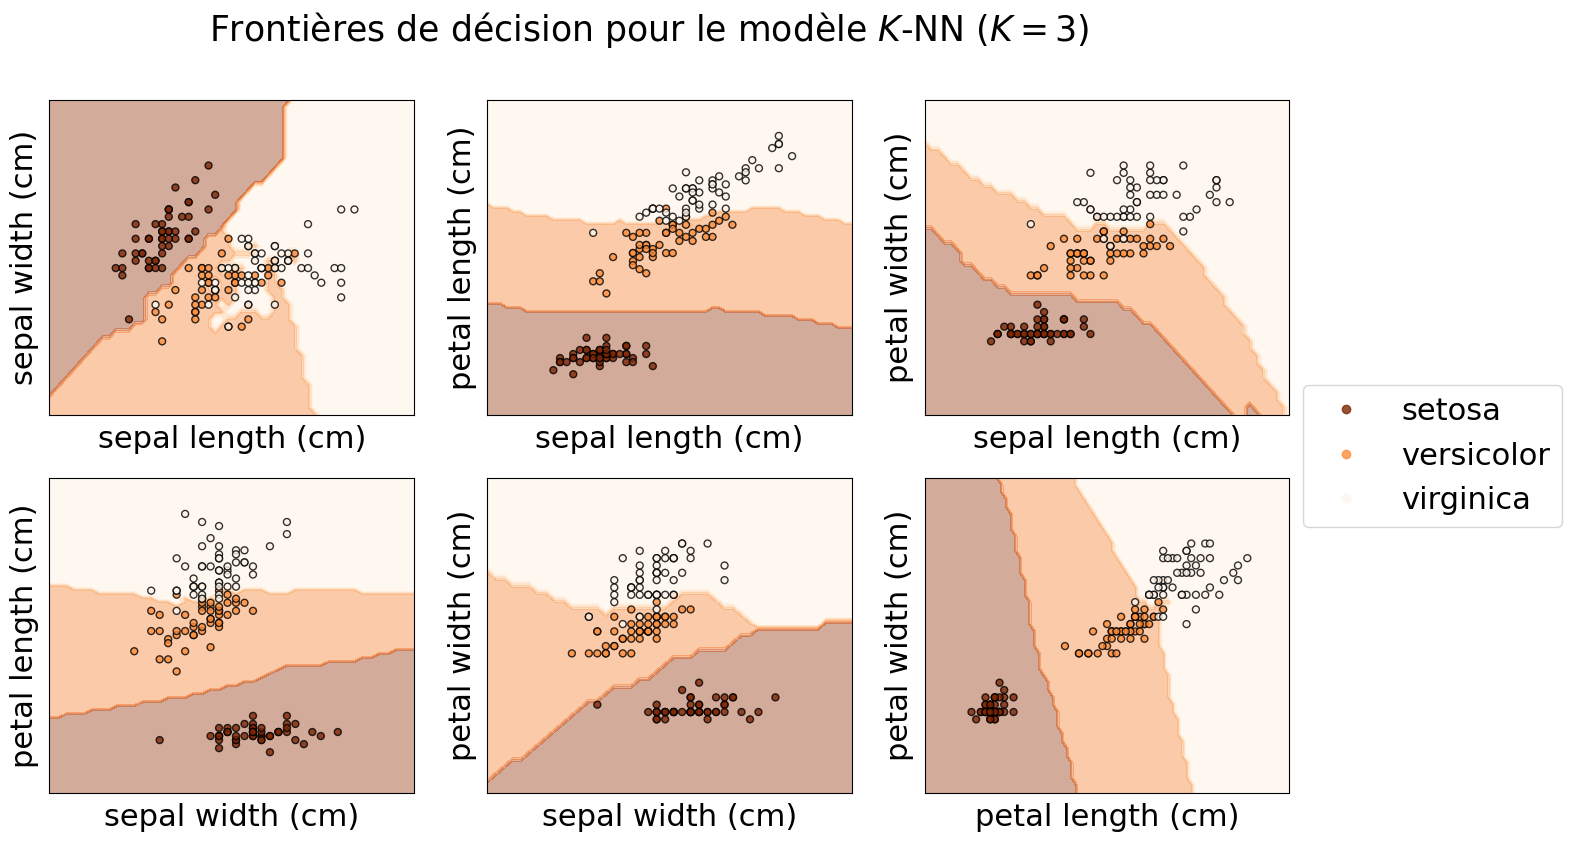

In [9]:
# Configuration des sous-plots en une matrice de dimensions 2x3 avec pour indices de positions : 

# / [0,0]  [0,1]  [0,2] \
# \ [1,0]  [1,1]  [1,2] /

fig, ax = plt.subplots(2, 3, figsize=(16,9))

# Itération sur toutes les combinaisons de deux features
for index, features in enumerate([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]):
    # Sélection des deux features
    x = iris.data[:, features]

    # Création du modèle KNN avec K=3
    classifieur = KNeighborsClassifier(n_neighbors = 3)

    # Entraînement du modèle
    classifieur.fit(x, y)

    # Définition de la plage de valeurs pour les axes des abscisses et des ordonnées
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

    # Prédiction des classes pour chaque point de la grille
    pred_frontière = classifieur.predict(np.c_[xx.ravel(), yy.ravel()])

    # Affichage du contour de décision
    pred_frontière = pred_frontière.reshape(xx.shape)
    
    # Comme index varie de 0 à 5, ax[index // 3, index % 3] permet de spécifier la position de chaque subplot.
    # Pour index = 0, on a index//3 = 0 et index%3 = 0, donc le graphe de la frontière de décision en fonction 
    # des features (0, 1), i.e. 'sepal length (cm)' et 'sepal width (cm)' sera placé en [0,0] dans les subplots.
    
    # De la même façon, pour index = 4, on a index//3 = 1 et index%3 = 1, donc le graphe de la frontière de 
    # décision en fonction des features (1, 3), i.e. 'sepal width (cm)' et 'petal width (cm)' sera placé en 
    # [1,1] dans les subplots.
    
    ax[index // 3, index % 3].contourf(xx, yy, pred_frontière,cmap='Oranges_r', alpha=0.4)

    # Affichage des points de données
    scatter = ax[index // 3, index % 3].scatter(x[:, 0], x[:, 1], c=y,cmap='Oranges_r', alpha=0.8, edgecolor="k", s=25)

    # Configuration de l'affichage
    # on affiche le nom du premier feature sur l'axe des abscisses
    ax[index // 3, index % 3].set_xlabel(iris.feature_names[features[0]]) 
    # on affiche le nom du second feature sur l'axe des ordonnées
    ax[index // 3, index % 3].set_ylabel(iris.feature_names[features[1]]) 
    ax[index // 3, index % 3].set_xticks(()) # on retire les graduations de l'axe des abscisses
    ax[index // 3, index % 3].set_yticks(()) # on retire les graduations de l'axe des ordonnées
    
    
# Création de la légende des couleurs
points = scatter.legend_elements()[0] # on récupère les différents points selon les espèces 
# On affiche la légende : pour chaque point, on associe le nom de l'espèce grâce à iris.target_names
# 'bbox_to_anchor' spécifie où la légende sera mise
plt.rcParams['legend.fontsize'] = 22 # on change la taille de police de la légende
fig.legend(points, iris.target_names, bbox_to_anchor=(0.58, 0.08, 0.5, 0.5))    
    
# Configuration du titre global
fig.suptitle("Frontières de décision pour le modèle $K$-NN ($K=3$)")

# Affichage de la figure
plt.show()

#### Validation croisée <a class="anchor" id="section_1_3"></a>

Voir : https://scikit-learn.org/stable/modules/cross_validation.html

Pour réaliser une validation croisée, on utilise la fonction `cross_val_score` de la librairie `sklearn.model_selection`.

In [11]:
from sklearn.model_selection import cross_val_score # on importe la fonction de validation croisée de Sklearn

# Définition de la plage de valeurs de K à tester (tous les entiers de 1 à 20)
paramètres_K = range(1,21)

# Pour chaque valeur de K, on découpe l'ensemble d'entrainement en un certain nombre de folds.
nombre_fold = 4

# Dictionnaire pour stocker les moyennes de scores de précision pour chaque valeur de K
scores_K = {}

# Pour chaque valeur de K, on réalise une validation croisée en 4 folds
for K in paramètres_K:
    classifieur_K = KNeighborsClassifier(n_neighbors=K) # on définit le classifieur pour K voisins
    # on calcule les scores de chaque fold 
    scores = cross_val_score(classifieur_K, X_train, y_train, cv=nombre_fold, scoring='accuracy') 
    scores_K[K] = scores.mean() # on affecte à la clé K la moyenne des scores des blocs 


# Affichage des scores de précision pour chaque valeur de K testée
print("Les scores moyens pour chaque valeur de K sont :\n")
for K in scores_K.keys():
    print(f"Pour K = {K} le taux de précision moyen est {scores_K[K]}")

# On récupère la valeur de K offrant la meilleure précision moyenne
# On récupère la clé de scores_k associée à la valeur maximale du dictionnaire
K_optimal = max(scores_K, key=lambda K: scores_K[K]) 
print(f"\nPour un découpage en {nombre_fold} folds, le meilleur K possible est: {K_optimal}")


Les scores moyens pour chaque valeur de K sont :

Pour K = 1 le taux de précision moyen est 0.96
Pour K = 2 le taux de précision moyen est 0.9299999999999999
Pour K = 3 le taux de précision moyen est 0.96
Pour K = 4 le taux de précision moyen est 0.95
Pour K = 5 le taux de précision moyen est 0.97
Pour K = 6 le taux de précision moyen est 0.97
Pour K = 7 le taux de précision moyen est 0.96
Pour K = 8 le taux de précision moyen est 0.96
Pour K = 9 le taux de précision moyen est 0.96
Pour K = 10 le taux de précision moyen est 0.95
Pour K = 11 le taux de précision moyen est 0.95
Pour K = 12 le taux de précision moyen est 0.95
Pour K = 13 le taux de précision moyen est 0.95
Pour K = 14 le taux de précision moyen est 0.95
Pour K = 15 le taux de précision moyen est 0.95
Pour K = 16 le taux de précision moyen est 0.95
Pour K = 17 le taux de précision moyen est 0.95
Pour K = 18 le taux de précision moyen est 0.96
Pour K = 19 le taux de précision moyen est 0.96
Pour K = 20 le taux de précision 

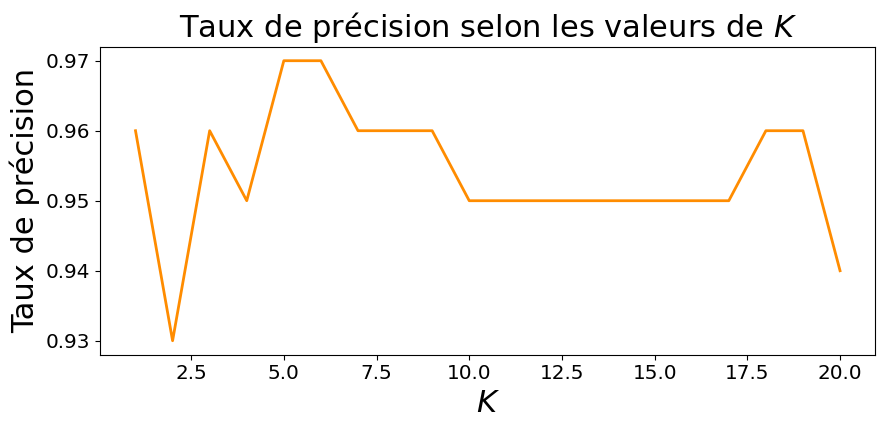

In [12]:
# On affiche graphiquement le score pour chaque K 
plt.figure(figsize=(10,4))
plt.plot(paramètres_K, scores_K.values(), c='darkorange', linewidth = 2)
plt.title('Taux de précision selon les valeurs de $K$')
plt.xlabel(r'$K$')
plt.ylabel('Taux de précision')
plt.show()

On peut désormais créer un classifieur $K$-NN avec le paramètre $K$ optimal.

In [13]:
knn_classifieur_k_opt = KNeighborsClassifier(n_neighbors=K_optimal) # on crée le classifieur K-NN pour le K optimal
knn_classifieur_k_opt.fit(X_train, y_train) # on entraine ce classifieur sur l'ensemble d'entrainement

KNeighborsClassifier()

### Régression logistique multi-catégories <a class="anchor" id="chapter2"></a>

Voir : https://en.wikipedia.org/wiki/Multinomial_logistic_regression

Les coefficients sont : [[-0.44613949  0.81178948 -2.29455193 -0.97610247]
 [ 0.49308722 -0.19831532 -0.18856473 -0.77526503]
 [-0.04694773 -0.61347416  2.48311666  1.7513675 ]]
L'ordonnée à l origine est : [  9.51948893   1.72634244 -11.24583137]


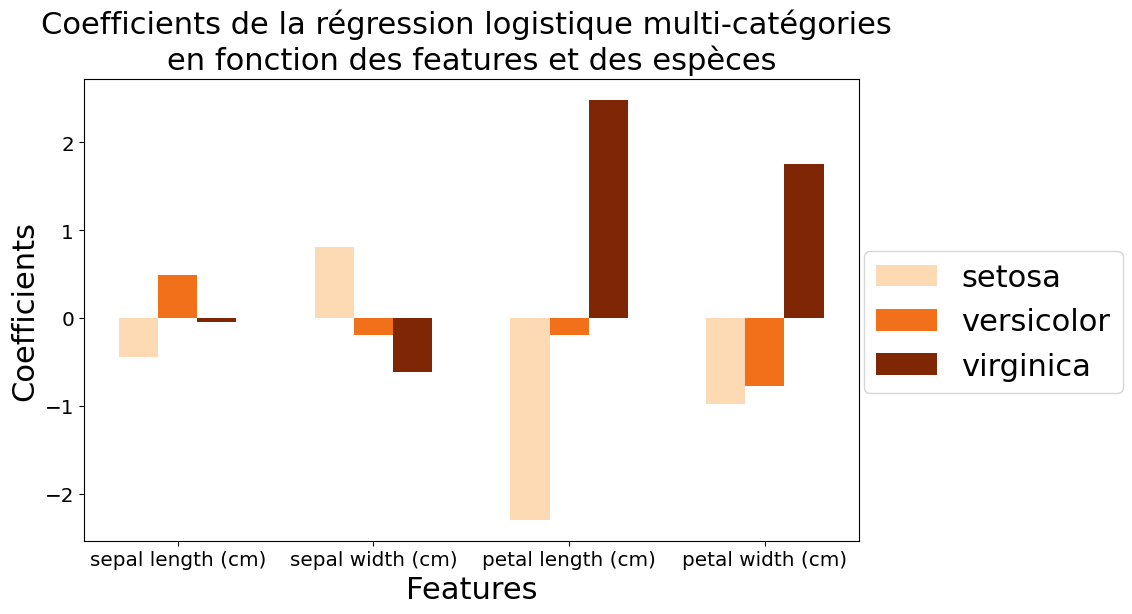

In [14]:
from sklearn.linear_model import LogisticRegression # on importe la fonction régression logistique de Sklearn

# On crée le modèle de régression logistique multi-catégories
# L'argument multi_class='multinomial' spécifie le cas de régression logistique
# L'argument solver='lbfgs'  spécifie l'algorithme d'optimisation utilisé pour estimer les paramètres du modèle.
Reglog = LogisticRegression(multi_class='multinomial', solver='lbfgs')
Reglog.fit(X_train,y_train) # on entraine le modèle sur l'ensemble d'entrainement

# On récupère les coefficients et l'intercept
coefficients = Reglog.coef_
intercept = Reglog.intercept_

print("Les coefficients sont :", coefficients)
print("L'ordonnée à l origine est :",intercept)

# Création d'un graphique sous forme de diagramme en bâton pour représenter les coefficients en fonction 
# des features et des espèces 

# on crée un vecteur allant de 0 au nombre de features, celui-ci sera utilisé pour la représentation du diagramme
num_features = np.arange(len(iris.feature_names))
# on spécifie la largeur des bâtons
width=0.2

# on crée un vecteur de couleurs (nuances de orange) (3 couleurs car 3 labels)
colors = plt.cm.Oranges(np.linspace(0.2, 1, 3))

# on initialise la figure
fig, ax = plt.subplots(figsize=(10, 6))

# pour chaque espèce d'iris
for i in range(len(iris.target_names)):
    # on affiche les coefficients par features
    ax.bar(num_features + i * width, coefficients[i], width, label=iris.target_names[i], color=colors[i])
    # num_features + i * width permet de faire un décallage entre chaque espèce pour éviter les superpositions

ax.set_xlabel('Features') # on affiche le label de l'axe des abscisses
ax.set_ylabel('Coefficients') # on affiche le label de l'axe des ordonnées
# on affiche le titre
ax.set_title('Coefficients de la régression logistique multi-catégories \nen fonction des features et des espèces') 
ax.legend(bbox_to_anchor=(0.86, 0.16, 0.5, 0.5)) #on affiche la légende

# on affiche les features sur l'axe des abscisses en spécifiant la taille entre chaque graduation
ax.set_xticks(num_features + (len(iris.target_names) - 1) * width / 2) 
ax.set_xticklabels(iris.feature_names)
plt.show()


### Comparaison des modèles <a class="anchor" id="chapter3"></a>

#### Taux de précision

Pour calculer les taux de précision des deux modèles de prédiction, nous utilisons la fonction `accuracy_score` de la librairie `sklearn.metrics`. 

Si $\hat{y}_i$ est le label prédit de la $i$-ème donnée et $y_i$ est le vrai label de la donnée correspondante, alors le taux de précision, i.e. le taux de prédictions correctes par rapport au nombre de données dans l'ensemble, est défini par : 
$$ \texttt{accuracy}(y,\hat{y}) = \dfrac{1}{\text{nombre de données}}\sum_{i=1}^{\text{nombre de données}}\mathbb{1}_{\{y_i = \hat{y}_i\}}$$

In [15]:
# on importe la fonction accuracy_score pour calculer les taux de précision
from sklearn.metrics import accuracy_score

# Pour le modèle K-NN
y_pred_KNN = knn_classifieur_k_opt.predict(X_test) # Prédiction des labels sur l'ensemble de test
# Pour la régression logistique multi-catégories
y_pred_Reglog = Reglog.predict(X_test) # Prédiction des labels sur l'ensembleensembleéchantillon de test

print(f'Le taux de précision pour le {K_optimal}-NN est : ', accuracy_score(y_pred_KNN, y_test))
print('Le taux de précision pour la régression logistique multi-catégories est : ', accuracy_score(y_pred_Reglog, y_test))

Le taux de précision pour le 5-NN est :  0.98
Le taux de précision pour la régression logistique multi-catégories est :  0.96


#### Matrices de confusion

Pour calculer les matrices de confusion des deux modèles de prédiction sur l'ensemble de test, nous utilisons la fonction `confusion_matrix` de la librairie `sklearn.metrics`. Pour les représenter sous forme de heatmap, nous utilisons la fonction `heatmap` de la librairie `seaborn`.

Une matrice de confusion est une matrice qui permet d'évaluer les performances d'un modèle de classification en comparant les prédictions du modèle avec les vrais labels des données.

Les modèles sont censés prédire :
 [[20  0  0]
 [ 0 11  0]
 [ 0  0 19]]

La matrice de confusion du modèle K-NN optimal est :
 [[20  0  0]
 [ 0 10  1]
 [ 0  0 19]]

La matrice de confusion du modèle de régression logistique multi-catégories est :
 [[20  0  0]
 [ 0 11  0]
 [ 0  2 17]]


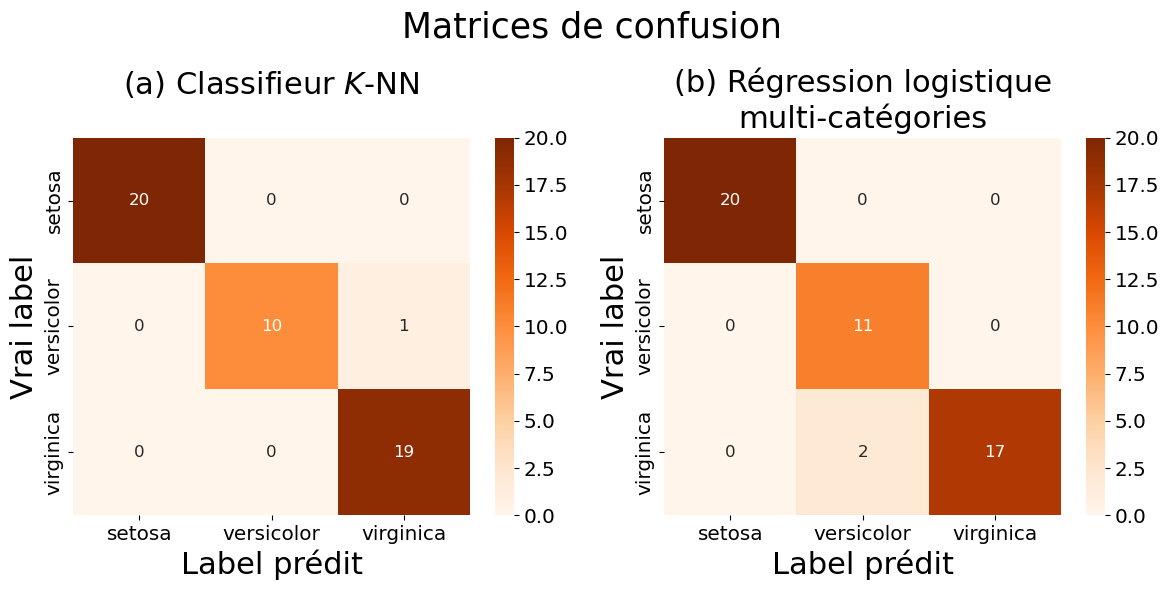

In [16]:
from sklearn.metrics import confusion_matrix # on importe la fonction confusion_matrix de la librairie Sklearn
import seaborn as sns # on importe la librairie Seaborn pour afficher les matrices de confusion sous forme d'heatmap
# Création du vecteur des nombres de vrais labels pour l'ensemble de test
vrais_labels = [len(y_test[y_test==i]) for i in range(len(iris.target_names))]
print("Les modèles sont censés prédire :\n",np.diag(vrais_labels))

# Création des matrices de confusion 
confusion_mat_knn = confusion_matrix(y_test, y_pred_KNN)# Pour le modèle K-NN
confusion_mat_reglog = confusion_matrix(y_test, y_pred_Reglog) # Pour la régression logistique multi-catégories

print("\nLa matrice de confusion du modèle K-NN optimal est :\n", confusion_mat_knn)
print("\nLa matrice de confusion du modèle de régression logistique multi-catégories est :\n", confusion_mat_reglog)


# Affichage des matrices de confusions sous forme de heatmap
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6)) # On crée une figure avec 2 subplots sur une seule ligne
# On affiche la matrice de confusion du modèle K-NN avec la fonction heatmap de la librairie Seaborn
sns.heatmap(confusion_mat_knn, annot=True, cmap='Oranges', cbar=True, ax=ax1) 
ax1.set_title('(a) Classifieur $K$-NN\n') # On affiche le titre du premier plot
ax1.set_xticklabels(iris.target_names) # On affiche le nom des espèces sur l'axe des abscisses
ax1.set_yticklabels(iris.target_names) # On affiche le nom des espèces sur l'axe des ordonnées
ax1.set_ylabel('Vrai label')# On affiche le label de l'axe des ordonnées du premier plot
ax1.set_xlabel('Label prédit')# On affiche le label de l'axe des abscisses du premier plot

# On affiche la matrice de confusion de la régression logistique multi-catégories avec la fonction heatmap de la librairie Seaborn
sns.heatmap(confusion_mat_reglog, annot=True, cmap='Oranges', cbar=True, ax=ax2) 
ax2.set_title('(b) Régression logistique\nmulti-catégories') # On affiche le titre du second plot
ax2.set_xticklabels(iris.target_names) # On affiche le nom des espèces sur l'axe des abscisses
ax2.set_yticklabels(iris.target_names) # On affiche le nom des espèces sur l'axe des ordonnées
ax2.set_ylabel('Vrai label')# On affiche le label de l'axe des ordonnées du second plot
ax2.set_xlabel('Label prédit')# On affiche le label de l'axe des abscisses du second plot
plt.suptitle('Matrices de confusion') # On affiche le titre général de la figure
fig.tight_layout()
plt.show()

### Conclusion <a class="anchor" id="chapter4"></a>

Nous avions pour objectif de créer deux modèles d'apprentissage pour réaliser une classification multi-catégories des données `iris` de la librairie `Scikit-Learn` et de les comparer. Le premier est le modèle $K$-Nearest Neighbors, sur qui nous avons appliqué une validation croisée afin de déterminer la valeur optimale de l'hyperparamètre $K$, et le second est un modèle de régression logistique multi-catégories. 

La comparaison de ces deux modèles nous a amené à conclure que le modèle $K^\star$-NN semble mieux prédire l'espèce d'iris en fonction des quatre features données. Cependant, les résultats obtenus sont tout de même très proches : $K^\star$-NN fait une erreur de prédiction et la régression multi-catégories en fait deux.

Sachant que notre ensemble de test est composé de seulement 50 observations et notre base de données totale est composée d'un total de 150 observations. Il aurait fallu avoir plus de données pour trancher de façon catégorique sur la méthode à privilégier. 

En effet, au cours de notre travail, nous avons pu constater qu'en modifiant la graine (`random_state`) ou en modifiant la répartition entre les ensembles d'entrainement et de test (`test_size`), les taux de précision et le choix de $K$ optimal pouvaient différer. 

Par exemple, pour `random_state = 42` et `test_size=0.4` (i.e. l'ensemble de test représente 40\% des données, soit 60 observations) nous trouvons : 

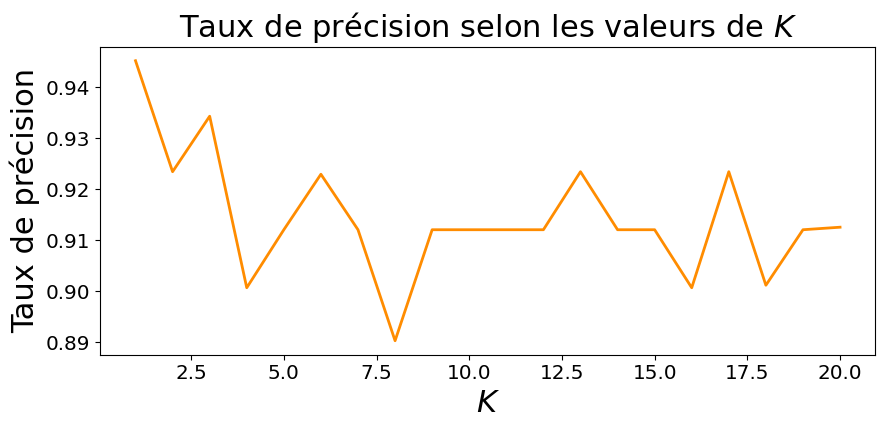


Pour un découpage en 3 folds, le meilleur K possible est: 1

Le taux de précision pour le 1-NN est :  0.9833333333333333
Le taux de précision pour la régression logistique multi-catégories est :  1.0

Les modèles sont censés prédire :
 [[23  0  0]
 [ 0 19  0]
 [ 0  0 18]]

La matrice de confusion du modèle K-NN optimal est :
 [[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]

La matrice de confusion du modèle de régression logistique multi-catégories est :
 [[23  0  0]
 [ 0 19  0]
 [ 0  0 18]]


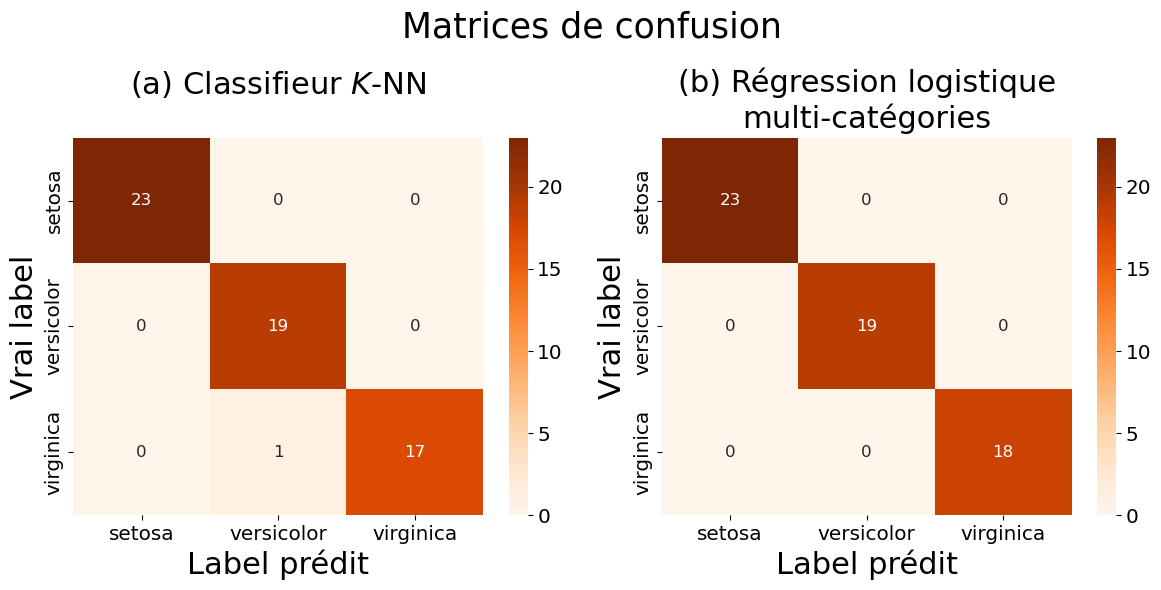

In [17]:
# SÉPARATION DES DONNÉES EN ENSEMBLES D'ENTRAINEMENT ET DE TEST

# On place 60% des données dans l'ensemble d'entrainement et 40% dans l'ensemble de test
taille_ensemble_test = 0.4
# On fixe la graine aléatoire de train_test_split
graine = 42

X_train_bis, X_test_bis, y_train_bis, y_test_bis = train_test_split(X, y, test_size=taille_ensemble_test, random_state=graine)


# VALIDATION CROISÉE POUR LE MODÈLE K-NN

# Définition de la plage de valeurs de K à tester (tous les entiers de 1 à 20)
paramètres_K = range(1,21)
# Pour chaque valeur de K, on découpe l'ensemble d'entrainement en un certain nombre de folds.
nombre_fold_bis = 3 # on prend 3 folds de 30 données
# Dictionnaire pour stocker les moyennes de scores de précision pour chaque valeur de K
scores_K_bis = {}

# Pour chaque valeur de K, on réalise une validation croisée en 3 folds
for K in paramètres_K:
    classifieur_K = KNeighborsClassifier(n_neighbors=K) # on définit le classifieur pour K voisins
    # on calcule les scores de chaque fold 
    scores = cross_val_score(classifieur_K, X_train_bis, y_train_bis, cv=nombre_fold, scoring='accuracy') 
    scores_K_bis[K] = scores.mean() # on affecte à la clé K la moyenne des scores des blocs 
    
# On affiche graphiquement le score pour chaque K 
plt.figure(figsize=(10,4))
plt.plot(paramètres_K, scores_K_bis.values(), c='darkorange', linewidth = 2)
plt.title('Taux de précision selon les valeurs de $K$')
plt.xlabel(r'$K$')
plt.ylabel('Taux de précision')
plt.show()

# On récupère la valeur de K offrant la meilleure précision moyenne
# On récupère la clé de scores_k associée à la valeur maximale du dictionnaire
K_optimal_bis = max(scores_K_bis, key=lambda K: scores_K_bis[K]) 
print(f"\nPour un découpage en {nombre_fold_bis} folds, le meilleur K possible est: {K_optimal_bis}")



# on crée le classifieur K-NN pour le K optimal
knn_classifieur_k_opt_bis = KNeighborsClassifier(n_neighbors=K_optimal_bis) 
knn_classifieur_k_opt_bis.fit(X_train_bis, y_train_bis) # on entraine ce classifieur sur l'ensemble d'entrainement

# MODÈLE DE RÉGRESSION LOGISTIQUE MULTI-CATÉGORIES

# On crée le modèle de régression logistique multi-catégories
Reglog_bis = LogisticRegression(multi_class='multinomial', solver='lbfgs')
Reglog_bis.fit(X_train_bis,y_train_bis) # on entraine le modèle sur l'ensemble d'entrainement

# COMPARAISON DES MODÈLES

# Taux de précision :
# Pour le modèle K-NN
y_pred_KNN_bis = knn_classifieur_k_opt_bis.predict(X_test_bis) # Prédiction des labels sur l'ensemble de test
# Pour la régression logistique multi-catégories
y_pred_Reglog_bis = Reglog_bis.predict(X_test_bis) # Prédiction des labels sur l'ensembleensembleéchantillon de test

print(f'\nLe taux de précision pour le {K_optimal_bis}-NN est : ', accuracy_score(y_pred_KNN_bis, y_test_bis))
print('Le taux de précision pour la régression logistique multi-catégories est : ', accuracy_score(y_pred_Reglog_bis, y_test_bis))



# Matrices de confusion

# Création du vecteur des nombres de vrais labels pour l'ensemble de test
vrais_labels_bis = [len(y_test_bis[y_test_bis==i]) for i in range(len(iris.target_names))]
print("\nLes modèles sont censés prédire :\n",np.diag(vrais_labels_bis))

# Création des matrices de confusion 
confusion_mat_knn_bis = confusion_matrix(y_test_bis, y_pred_KNN_bis)# Pour le modèle K-NN
confusion_mat_reglog_bis = confusion_matrix(y_test_bis, y_pred_Reglog_bis) # Pour la régression logistique multi-catégories

print("\nLa matrice de confusion du modèle K-NN optimal est :\n", confusion_mat_knn_bis)
print("\nLa matrice de confusion du modèle de régression logistique multi-catégories est :\n", confusion_mat_reglog_bis)


# Affichage des matrices de confusions sous forme de heatmap
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6)) # On crée une figure avec 2 subplots sur une seule ligne
# On affiche la matrice de confusion du modèle K-NN avec la fonction heatmap de la librairie Seaborn
sns.heatmap(confusion_mat_knn_bis, annot=True, cmap='Oranges', cbar=True, ax=ax1) 
ax1.set_title('(a) Classifieur $K$-NN\n') # On affiche le titre du premier plot
ax1.set_xticklabels(iris.target_names) # On affiche le nom des espèces sur l'axe des abscisses
ax1.set_yticklabels(iris.target_names) # On affiche le nom des espèces sur l'axe des ordonnées
ax1.set_ylabel('Vrai label')# On affiche le label de l'axe des ordonnées du premier plot
ax1.set_xlabel('Label prédit')# On affiche le label de l'axe des abscisses du premier plot

# On affiche la matrice de confusion de la régression logistique multi-catégories avec la fonction heatmap de la librairie Seaborn
sns.heatmap(confusion_mat_reglog_bis, annot=True, cmap='Oranges', cbar=True, ax=ax2) 
ax2.set_title('(b) Régression logistique\nmulti-catégories') # On affiche le titre du second plot
ax2.set_xticklabels(iris.target_names) # On affiche le nom des espèces sur l'axe des abscisses
ax2.set_yticklabels(iris.target_names) # On affiche le nom des espèces sur l'axe des ordonnées
ax2.set_ylabel('Vrai label')# On affiche le label de l'axe des ordonnées du second plot
ax2.set_xlabel('Label prédit')# On affiche le label de l'axe des abscisses du second plot
plt.suptitle('Matrices de confusion') # On affiche le titre général de la figure
fig.tight_layout()
plt.show()



Nous trouvons cette fois que le modèle de régression logistisque multi-catégories ne fait aucune erreur de prédiction, contre une seule erreur pour le modèle $K^\star$-NN avec cette fois-ci $K^\star = 1$. Dans ce cas, le modèle de régression logistique multi-catégories est plus performant que le modèle $K^\star$-NN.

Il serait donc plus pertinent de mener cette même étude avec plus de données pour comparer les résultats obtenus avec les nôtres. 